In [59]:
import os
import h5py

data_dir='/data/scratch/jiayin/milan'
aggr_time='hour' # "hour"
file_name = "milan_{}_T_N_5.h5".format(
            'min' if aggr_time is None else aggr_time)
# file_name = "data_git_version.h5"
filePath = os.path.join(data_dir, file_name)

with h5py.File(filePath, 'r') as f:
    print("Keys in HDF5 file:", list(f.keys()))
    # 读取数据集
    data = f['data'][:]

print('data shape: ', data.shape)


Keys in HDF5 file: ['data', 'time']
data shape:  (1488, 10000, 5)


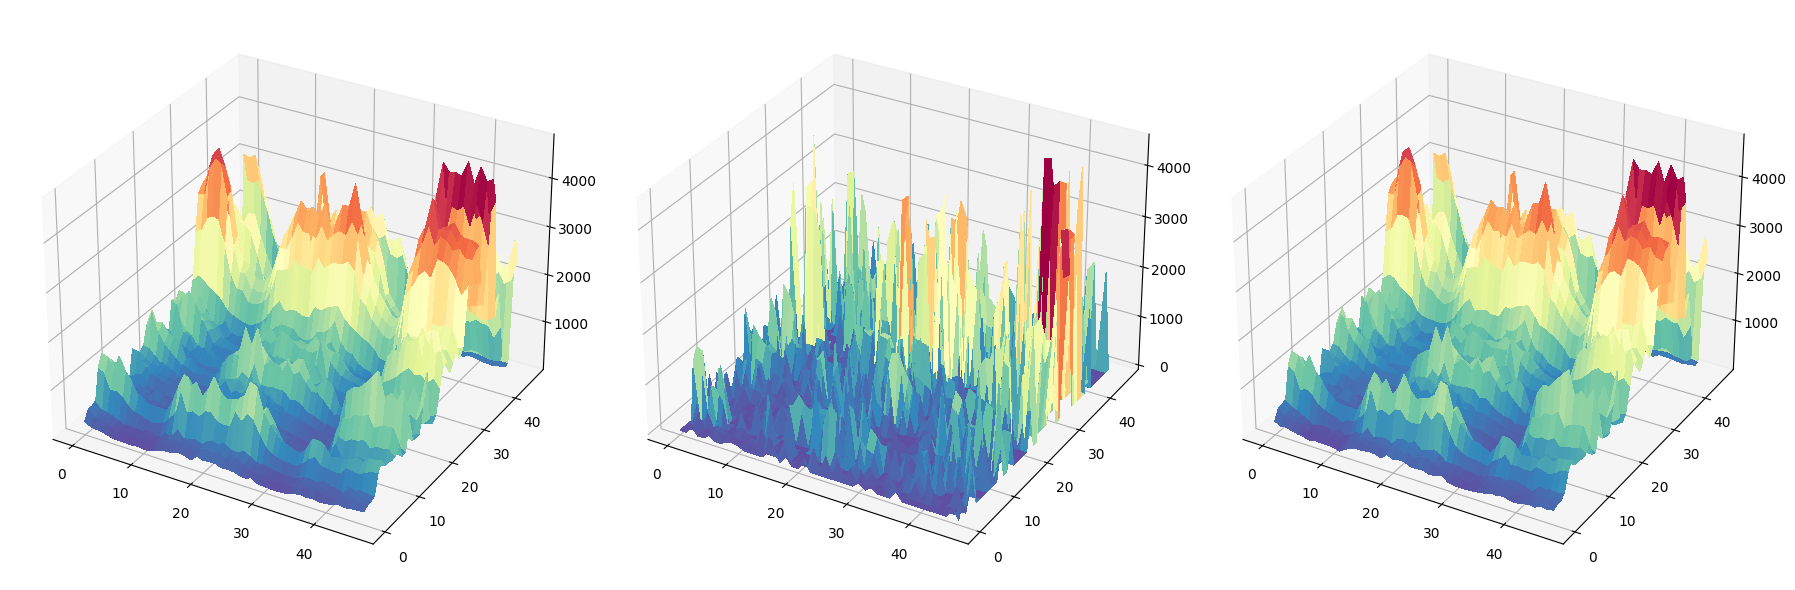

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib import font_manager

font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
my_font = font_manager.FontProperties(fname=font_path)

# 假设你已有的真实流量数据为 data_plot，维度 [1488, 10000]
data_plot = data[212:212+47, 4122:4122+47, 4]

# 创建时间和路径的网格
time = np.arange(data_plot.shape[0])
path = np.arange(data_plot.shape[1])
T, P = np.meshgrid(time, path, indexing='ij')

# 随机采样部分数据
sample_ratio = 0.3
num_samples = int(sample_ratio * data_plot.size)
sample_indices = np.unravel_index(np.random.choice(data_plot.size, num_samples, replace=False), data_plot.shape)
sampled_mask = np.zeros_like(data_plot, dtype=bool)
sampled_mask[sample_indices] = True

# 构建采样数据（其余为0）
sampled_Z = np.zeros_like(data_plot)
sampled_Z[sampled_mask] = data_plot[sampled_mask]


# PCA 重建函数（按路径维度重建）
def pca_reconstruct(data, mask, n_components=100):
    masked_data = np.where(mask, data, 0)
    data_T = masked_data.T
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(data_T)
    restored = pca.inverse_transform(reduced)
    return restored.T


# reconstructed = pca_reconstruct(data_plot, sampled_mask, n_components=40)
reconstructed = data_plot + np.random.randn(*data_plot.shape) *20

# 可视化函数
# ValueError: 'spectral' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
def plot_surface(ax, X, Y, Z, title=None, show_colorbar=False):
    surf = ax.plot_surface(X, Y, Z, cmap='Spectral_r', linewidth=0, antialiased=False)
    if title is not None:
        ax.set_title(title, fontproperties=my_font, fontsize=20)
        ax.set_xlabel('时间', fontproperties=my_font, fontsize=20)
        ax.set_ylabel('路径', fontproperties=my_font, fontsize=20)
    # ax.set_zlabel('Flow')
    if show_colorbar:
        plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    ax.view_init(elev=30, azim=-60)  # 改变视角让图朝右


# 绘图
fig = plt.figure(figsize=(18, 6))

# 原始数据
ax1 = fig.add_subplot(131, projection='3d')
plot_surface(ax1, T, P, data_plot)

# 采样数据
ax2 = fig.add_subplot(132, projection='3d')
plot_surface(ax2, T, P, sampled_Z)

# PCA重建数据
ax3 = fig.add_subplot(133, projection='3d')
plot_surface(ax3, T, P, reconstructed)

plt.tight_layout()
plt.savefig("reconstruction.png", dpi=300, bbox_inches='tight')

plt.show()




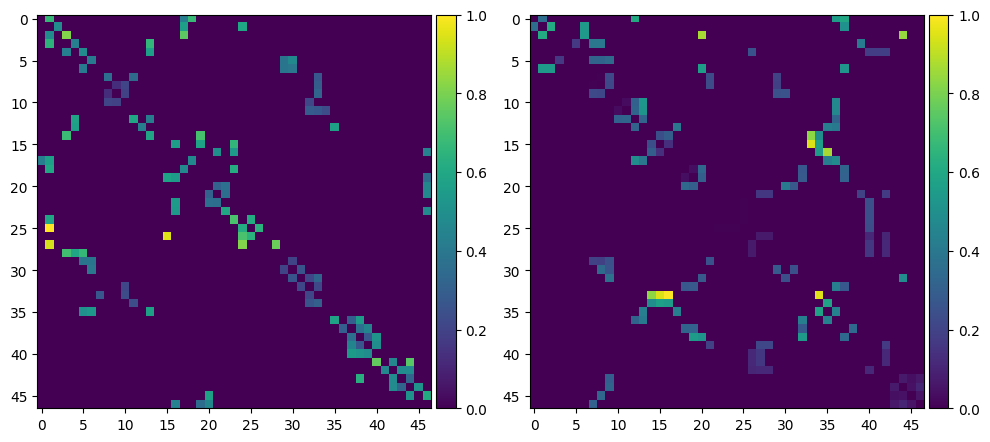

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 取子块数据
data_plot = data[212:212 + 47, 3219:3219 + 47, 4]

# 计算第一维（时间）方向的图结构
G_time = kneighbors_graph(data_plot, n_neighbors=3, mode='distance', include_self=False)
G_time_matrix = G_time.toarray()
max_val = G_time_matrix.max()
if max_val > 0:
    G_time_matrix = G_time_matrix / max_val

# 计算第二维（路径）方向的图结构
G_path = kneighbors_graph(data_plot.T, n_neighbors=4, mode='distance', p=1, include_self=False)
G_path_matrix = G_path.toarray()
max_val = G_path_matrix.max()
if max_val > 0:
    G_path_matrix = G_path_matrix / max_val

# 创建图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 左图：时间方向图结构
im1 = axs[0].imshow(G_time_matrix, cmap='viridis')
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)

# 右图：路径方向图结构
im2 = axs[1].imshow(G_path_matrix, cmap='viridis')
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)

# 显示坐标轴刻度数值（去掉 label 和标题）
for ax in axs:
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(np.arange(0, 47, 5))
    ax.set_yticks(np.arange(0, 47, 5))

plt.tight_layout()
plt.savefig("graph_structure.png", dpi=300, bbox_inches='tight')

plt.show()

